# Yelp Rating Regression Predictor

The restaurant industry is tougher than ever, with restaurant reviews blazing across the internet from day one of a restaurant's opening. Since a restaurant's success is highly correlated with its reputation, in this project, I'll discover what makes a restaurant gets the best reviews on the most queried restaurant review site, Yelp. With a dataset of different restaurant features and their Yelp ratings, I will use a Multiple Linear Regression model to investigate what factors most affect a restaurant's Yelp rating.

In this project I'll be working with datasets provided by Yelp: 
* `yelp_business.json`: establishment data regarding location and attributes for all businesses in the dataset
* `yelp_review.json`: Yelp review metadata by business
* `yelp_user.json`: user profile metadata by business
* `yelp_checkin.json`: online checkin metadata by business
* `yelp_tip.json`: tip metadata by business
* `yelp_photo.json`: photo metadata by business

For detailed explanation of the features in each `.json` file, see the accompanying [feature_descriptions](https://github.com/AhmedHajAhmed/Yelp_Rating_Regression_Predictor/blob/main/feature_descriptions).



### Load the Data 

Load the data from each of the .json files with the following naming conventions:
* `yelp_business.json` into a DataFrame named `businesses`
* `yelp_review.json` into a DataFrame named `reviews`
* `yelp_user.json` into a DataFrame named `users`
* `yelp_checkin.json` into a DataFrame named `checkins`
* `yelp_tip.json` into a DataFrame named `tips`
* `yelp_photo.json` into a DataFrame named `photos`

In [1]:
import pandas as pd 

businesses = pd.read_json("yelp_business.json", lines=True)

reviews = pd.read_json("yelp_review.json", lines=True)

users = pd.read_json("yelp_user.json", lines=True)

checkins = pd.read_json("yelp_checkin.json", lines=True)

tips = pd.read_json("yelp_tip.json", lines=True)

photos = pd.read_json("yelp_photo.json", lines=True)

In order to more clearly see the information in our DataFrame, I'll adjust the number of columns shown and the number of characters shown in a column.

In [2]:
pd.options.display.max_columns = 60

pd.options.display.max_colwidth = 500

In [4]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [5]:
reviews

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7
...,...,...,...,...,...,...,...
188588,zzvlwkcNR1CCqOPXwuvz2A,354.400000,591.200000,0.572020,0,0,2
188589,zzwaS0xn1MVEPEf0hNLjew,1523.338235,441.808824,0.558659,46,49,81
188590,zzwhN7x37nyjP0ZM8oiHmw,597.363636,494.477273,0.839727,9,28,51
188591,zzwicjPC9g246MK2M1ZFBA,1016.619048,609.698413,0.455297,35,34,110


In [6]:
users

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909
...,...,...,...,...,...,...
188588,zzvlwkcNR1CCqOPXwuvz2A,64.200000,875.400000,1.400000,32.200000,0.400000
188589,zzwaS0xn1MVEPEf0hNLjew,187.735294,2489.235294,11.176471,109.352941,1.176471
188590,zzwhN7x37nyjP0ZM8oiHmw,92.750000,1638.750000,4.068182,73.386364,0.545455
188591,zzwicjPC9g246MK2M1ZFBA,101.317460,2059.063492,13.460317,158.047619,0.920635


In [7]:
checkins

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4
...,...,...,...,...
157070,G6zYdHNPqSbw_Nom8ZxtVA,"{'Sat-0': 1, 'Fri-19': 1}",0,2
157071,vMF4euV_C_2e_2H3F-OCUg,"{'Thu-21': 1, 'Thu-22': 12, 'Thu-23': 1}",14,0
157072,C_-8AEMAJG6MvE3b6ou-ow,"{'Wed-22': 1, 'Fri-23': 1}",1,1
157073,rCMWUkhQ3phhBUlXevrkfg,"{'Mon-17': 1, 'Sat-19': 1, 'Sun-20': 1}",1,2


In [8]:
tips

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154
...,...,...,...
121521,zztHqd_3ULxuIS8lkhYdwg,110.500000,2
121522,zzwaS0xn1MVEPEf0hNLjew,62.368421,19
121523,zzwhN7x37nyjP0ZM8oiHmw,165.000000,3
121524,zzwicjPC9g246MK2M1ZFBA,92.461538,13


In [9]:
photos

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4
...,...,...,...
32971,zzlZJVkEhOzR2tJOLHcF2A,31.000000,1
32972,zzmIMvqiBJ_-wVKg_OnGpw,13.000000,2
32973,zzvlwkcNR1CCqOPXwuvz2A,0.000000,1
32974,zzwaS0xn1MVEPEf0hNLjew,0.000000,1


How many different businesses are in the dataset? 

In [10]:
len(businesses)

188593

### Merge the Data

Since I'm working with data from several files, I'll combine the data into a single DataFrame that allows to analyze the different features with respect to the target variable, the Yelp rating. I'll do this by merging the multiple DataFrames together, joining them on the columns they have in common. In thia case, this unique identifying column is the `business_id`. 

Given that I have six DataFrames, I'll need to perform 5 merges to combine all the data into one DataFrame. I'll use `how=left` since not every DataFrame includes every business in the dataset (this way I won't lose any data during the merges).

In [11]:
df = pd.merge(businesses, reviews, how="left", on="business_id")

df = pd.merge(df, users, how="left", on="business_id")

df = pd.merge(df, checkins, how="left", on="business_id")

df = pd.merge(df, tips, how="left", on="business_id")

df = pd.merge(df, photos, how="left", on="business_id")

To confirm, print number of rows:

In [12]:
len(df)

188593

Print columns:

In [13]:
df.columns

Index(['address', 'alcohol?', 'attributes', 'business_id', 'categories',
       'city', 'good_for_kids', 'has_bike_parking', 'has_wifi', 'hours',
       'is_open', 'latitude', 'longitude', 'name', 'neighborhood',
       'postal_code', 'price_range', 'review_count', 'stars', 'state',
       'take_reservations', 'takes_credit_cards', 'average_review_age',
       'average_review_length', 'average_review_sentiment',
       'number_funny_votes', 'number_cool_votes', 'number_useful_votes',
       'average_number_friends', 'average_days_on_yelp', 'average_number_fans',
       'average_review_count', 'average_number_years_elite', 'time',
       'weekday_checkins', 'weekend_checkins', 'average_tip_length',
       'number_tips', 'average_caption_length', 'number_pics'],
      dtype='object')

### Clean the Data

In a Linear Regression model, the features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating. For this project I'll also be working with some features that are binary. Thus, I can remove any columns in the dataset that are not continuous or binary, and that I do not want to make predictions on. 

The features I'll remove are `address`, `attributes`, `business_id`, `categories`, `city`, `hours`, `is_open`, `latitude`, `longitude`, `name`, `neighborhood`, `postal_code`, `state`, and `time`.

In [14]:
features_to_remove = ['address', 'attributes', 'business_id', 'categories', 'city', 'hours', 'is_open', 'latitude', 'longitude', 'name', 'neighborhood', 'postal_code', 'state', 'time']

df.drop(labels=features_to_remove, axis=1, inplace=True)

In [16]:
df.columns

Index(['alcohol?', 'good_for_kids', 'has_bike_parking', 'has_wifi',
       'price_range', 'review_count', 'stars', 'take_reservations',
       'takes_credit_cards', 'average_review_age', 'average_review_length',
       'average_review_sentiment', 'number_funny_votes', 'number_cool_votes',
       'number_useful_votes', 'average_number_friends', 'average_days_on_yelp',
       'average_number_fans', 'average_review_count',
       'average_number_years_elite', 'weekday_checkins', 'weekend_checkins',
       'average_tip_length', 'number_tips', 'average_caption_length',
       'number_pics'],
      dtype='object')

Now check to make sure I don't have any missing values, or `NaN`s, which will prevent the Linear Regression model from running correctly. 

In [17]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

There are a few columns with missing values. Since the dataset has no information recorded for some businesses in these columns, I will assume the Yelp pages did not display these features. For example, if there is a `NaN` value for `number_pics`, it means that the associated business did not have any pictures posted on its Yelp page. Thus, I'll replace all of our `NaN`s with `0`s. 

In [18]:
df.fillna({"weekday_checkins": 0,
          "weekend_checkins": 0,
          "average_tip_length": 0,
          "number_tips": 0,
          "average_caption_length": 0,
          "number_pics": 0},
         inplace=True)

In [19]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

### Exploratory Data Analysis

Now that the data is cleaned and prepared, let's investigate some of the different features to see what might correlate most with our dependent variable, the Yelp rating (called `stars` in the DataFrame). The features with the best correlations could prove to be the most helpful for the Linear Regression model.

Print correlation coefficients for each pair of our different features:

Note: a correlation of `0` indicates that two features have no linear relationship, a correlation coefficient of `1` indicates two features have a perfect positive linear relationship, and a correlation coefficient of `-1` indicates two features have a perfect negative linear relationship.

In [21]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


To further visualize these relationships, I'll plot the three features that correlate most with Yelp rating (`average_review_sentiment`, `average_review_length`, `average_review_age`) against `stars`, the Yelp rating. Then I'll plot a lowly correlating feature, such as `number_funny_votes`, against `stars`.

Note: `average_review_sentiment` is the average sentiment score for all reviews on a business' Yelp page. The sentiment score for a review was calculated using the sentiment analysis tool [VADER](https://github.com/cjhutto/vaderSentiment). VADER uses a labeled set of positive and negative words, along with codified rules of grammar, to estimate how positive or negative a statement is. Scores range from `-1`, most negative, to `+1`, most positive, with a score of `0` indicating a neutral statement. While not perfect, VADER does a good job at guessing the sentiment of text data.

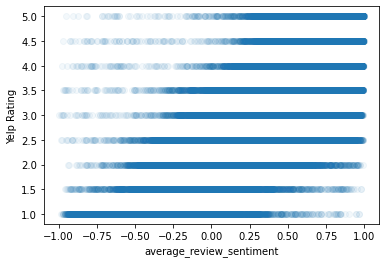

In [24]:
from matplotlib import pyplot as plt

# average_review_sentiment against stars
plt.scatter(df["average_review_sentiment"], df["stars"], alpha=0.05)
plt.xlabel("average_review_sentiment")
plt.ylabel("Yelp Rating")
plt.show()

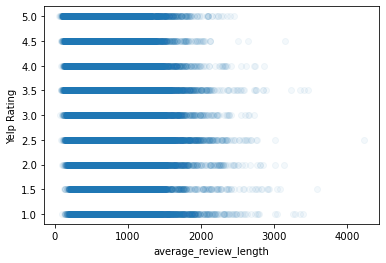

In [25]:
# average_review_length against start
plt.scatter(df["average_review_length"], df["stars"], alpha=0.05)
plt.xlabel("average_review_length")
plt.ylabel("Yelp Rating")
plt.show()

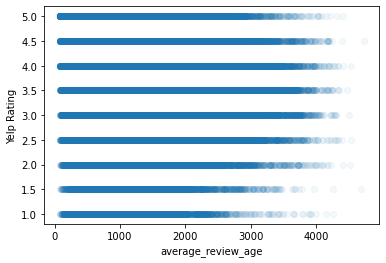

In [26]:
# average_review_age against stars
plt.scatter(df["average_review_age"], df["stars"], alpha=0.05)
plt.xlabel("average_review_age")
plt.ylabel("Yelp Rating")
plt.show()

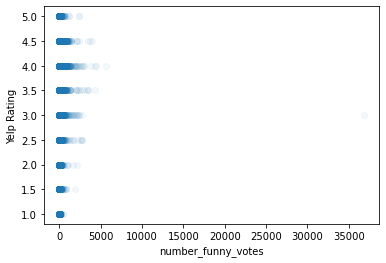

In [27]:
# number_funny_votes against stars
plt.scatter(df["number_funny_votes"], df["stars"], alpha=0.05)
plt.xlabel("number_funny_votes")
plt.ylabel("Yelp Rating")
plt.show()

By looking at these visualizations, it seems that the `average_review_sentiment` correlates best with Yelp rating.

### Data Selection

From the correlation analysis it's obvious that the three features with the strongest correlations to Yelp rating are `average_review_sentiment`, `average_review_length`, and `average_review_age`. As I want to dig a little deeper than `average_review_sentiment`, which clearly has a very high correlation with Yelp rating, let's choose to create the first model with `average_review_length` and `average_review_age` as features.

Create a new DataFrame `features` that contains the columns we want to model on: `average_review_length` and `average_review_age`. And another DataFrame `ratings` that stores the value we want to predict, Yelp rating, or `stars` in `df`.

In [28]:
features = df[["average_review_length", "average_review_age"]]

ratings = df["stars"]

### Split Data

Split the data into a training set and a test set to evaluate how well the model performs. 

In [30]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)

### Create and Train the Model

Now that the data is split into training and testing sets, let's model.

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

### Evaluate and Understand the Model

The first way to evaluate the model will be by using the `.score()` method, which provides the R^2 value for our model.

Note: R^2 is the coefficient of determination, or a measure of how much of the variance in our dependent variable, the predicted Yelp rating, is explained by our independent variables, our feature data. R^2 values range from `0` to `1`, with `0` indicating that the created model does not fit our data at all, and with `1` indicating the model perfectly fits our feature data. 

In [35]:
model.score(X_train, y_train)

0.08250309566544889

In [36]:
model.score(X_test, y_test)

0.08083081210060561

Take a look at the coefficients on the different features. 

In [37]:
sorted(list(zip(["average_review_length", "average_review_age"], model.coef_)), key = lambda x: abs(x[1]), reverse=True)

[('average_review_length', -0.0009977176852074524),
 ('average_review_age', -0.00011621626836366473)]

Calculate the predicted Yelp ratings for the testing data and compare them to their actual Yelp ratings.

In [38]:
y_predicted = model.predict(X_test)

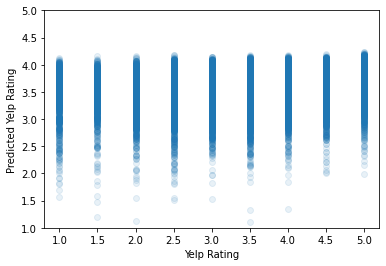

In [39]:
plt.scatter(y_test, y_predicted, alpha=0.1)
plt.xlabel("Yelp Rating")
plt.ylabel("Predicted Yelp Rating")
plt.ylim(1, 5)
plt.show()

For a perfect linear regression model we would expect to see the data plotted along the line y = x, indicating homoscedasticity. Is this the case? No, this model is heteroscedastic.

### Define Different Subsets of Data

After evaluating the first model, it's clear that `average_review_length` and `average_review_age` alone are not the best predictors for Yelp rating. Let's go do some more modeling with different subsets of features to hopefully achieve a more accurate model. In the cells below are different lists of subsets of features that I'll model with and evaluate. 

In [40]:
# subset of only average_review_sentiment 
sentiment = ["average_review_sentiment"]

In [41]:
# subset of all features that have a "0" or "1" response range
binary_features = ["alcohol?", "has_bike_parking", "takes_credit_cards", "good_for_kids", "take_reservations", "has_wifi"]

In [64]:
# subset of all features that vary on a greater range than "0" or "1"
numeric_features = ["review_count", "price_range", "average_caption_length", "number_pics", "average_review_age", "average_review_length", "average_review_sentiment", "number_funny_votes", "number_cool_votes", "number_useful_votes", "average_tip_length", "number_tips", "average_number_friends", "average_days_on_yelp", "average_number_fans", "average_review_count", "average_number_years_elite", "weekday_checkins", "weekend_checkins"]

In [67]:
# all features
all_features = binary_features + numeric_features

### Further Modeling

Now I'll create new models using the new lists of features. In order to more easily compare the performance of the new models, I'll create the function `model_features()`, which basically replicates the model building process.

In [71]:
import numpy as np

def model_features(feature_list):
    
    # define ratings and features
    ratings = df.loc[:, "stars"]
    features = df.loc[:, feature_list]
    
    # perform train, test, split on the data
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)
    
    # to allow the model to work when modeling on only one feature instead of multiple features
    if len(X_train.shape) < 2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
    
    # create and fit the model 
    model = LinearRegression()
    model.fit(X_train,y_train)
    
    # print train and test scores
    print("Train Score: ", model.score(X_train, y_train))
    print("Test Score: ", model.score(X_test, y_test), "\n")
    
    # print model features and their corresponding coefficients, from most predictive to least predictive
    print("Features and coefficients: ")
    print(sorted(list(zip(feature_list, model.coef_)), key = lambda x: abs(x[1]), reverse=True))
    
    # calculate the predicted Yelp ratings from the test data
    y_predicted = model.predict(X_test)
    
    # plot actual Yelp Ratings against predicted Yelp ratings for the test data
    plt.scatter(y_test, y_predicted, alpha=0.05)
    plt.xlabel("Yelp Rating")
    plt.ylabel("Predicted Yelp Rating")
    plt.ylim(1,5)
    plt.show()

Now let's run models on `sentiment`, `binary_features`, `numeric_features`, and `all_features`.

Train Score:  0.6118980950438655
Test Score:  0.6114021046919492 

Features and coefficients: 
[('average_review_sentiment', 2.3033908433749612)]


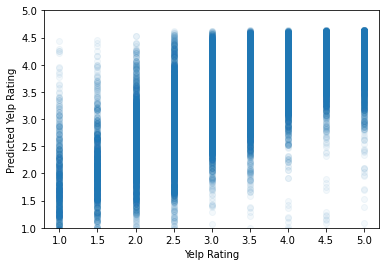

In [60]:
# model on sentiment
model_features(sentiment)

Train Score:  0.012223180709591164
Test Score:  0.010119542202269072 

Features and coefficients: 
[('has_bike_parking', 0.19003008208038988), ('alcohol?', -0.14549670708138188), ('has_wifi', -0.1318739757776259), ('good_for_kids', -0.08632485990337416), ('takes_credit_cards', 0.071755364921953), ('take_reservations', 0.04526558530451624)]


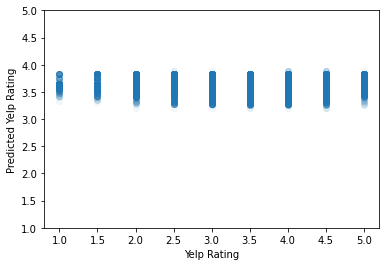

In [58]:
# model on binary features
model_features(binary_features)

Train Score:  0.6734992593766658
Test Score:  0.6713318798120151 

Features and coefficients: 
[('average_review_sentiment', 2.2721076642095714), ('price_range', -0.08046080962701326), ('average_number_years_elite', -0.07190366288054215), ('average_caption_length', -0.00334706600778448), ('number_pics', -0.0029565028128954863), ('number_tips', -0.0015953050789045838), ('number_cool_votes', 0.0011468839227079775), ('average_number_fans', 0.0010510602097412254), ('average_review_length', -0.0005813655692093357), ('average_tip_length', -0.0005322032063459733), ('number_useful_votes', -0.0002320378475871201), ('average_review_count', -0.0002243170289501482), ('average_review_age', -0.00016930608165055923), ('average_days_on_yelp', 0.00012878025876674438), ('weekday_checkins', 5.91858075448613e-05), ('weekend_checkins', -5.518176206999151e-05), ('average_number_friends', 4.8269921116315975e-05), ('review_count', -3.483483763748981e-05), ('number_funny_votes', -7.884395673808679e-06)]


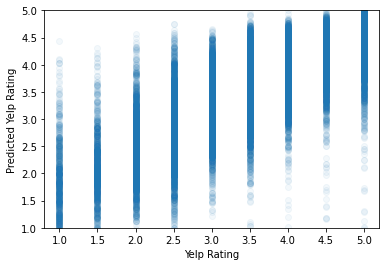

In [65]:
# model on numeric features
model_features(numeric_features)

Train Score:  0.6807828861895334
Test Score:  0.6782129045869247 

Features and coefficients: 
[('average_review_sentiment', 2.2808456996623825), ('alcohol?', -0.14991498593470284), ('has_wifi', -0.12155382629261363), ('good_for_kids', -0.1180781442201382), ('price_range', -0.06486730150043177), ('average_number_years_elite', -0.06278939713895364), ('has_bike_parking', 0.027296969912292805), ('takes_credit_cards', 0.024451837853653652), ('take_reservations', 0.014134559172969846), ('number_pics', -0.0013133612300796843), ('average_number_fans', 0.0010267986822656814), ('number_cool_votes', 0.0009723722734409323), ('number_tips', -0.0008546563320873921), ('average_caption_length', -0.0006472749798195219), ('average_review_length', -0.0005896257920272453), ('average_tip_length', -0.00042052175034042557), ('number_useful_votes', -0.00027150641256153645), ('average_review_count', -0.000233983569025111), ('average_review_age', -0.00015776544111324774), ('average_days_on_yelp', 0.00012326147

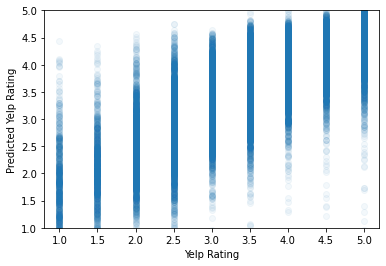

In [68]:
# model on all features
model_features(all_features)

It seems like using the binary features would give the worst model, and using all features would give the best model.

### Using the Model to Predict 

After cleaning, modeling, and evaluating the data. Let's use the model to predict what will be a restaurant's Yelp rating.

The best model was the model using all features, so I'll use this model.

In [69]:
all_features

['alcohol?',
 'has_bike_parking',
 'takes_credit_cards',
 'good_for_kids',
 'take_reservations',
 'has_wifi',
 'review_count',
 'price_range',
 'average_caption_length',
 'number_pics',
 'average_review_age',
 'average_review_length',
 'average_review_sentiment',
 'number_funny_votes',
 'number_cool_votes',
 'number_useful_votes',
 'average_tip_length',
 'number_tips',
 'average_number_friends',
 'average_days_on_yelp',
 'average_number_fans',
 'average_review_count',
 'average_number_years_elite',
 'weekday_checkins',
 'weekend_checkins']

Retrain our model on all features:

In [72]:
features = df.loc[:, all_features]

ratings = df.loc[:, "stars"]

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size = 0.2, random_state = 1)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

To get some perspective on the restaurants already out there, let's have a look at the mean, minimum, and maximum values for each feature.

In [73]:
pd.DataFrame(list(zip(features.columns, features.describe().loc["mean"], features.describe().loc["min"], features.describe().loc["max"])), columns=["Feature", "Mean", "Min", "Max"])

,Feature,Mean,Min,Max
0,alcohol?,0.140610,0.000000,1.000000
1,has_bike_parking,0.350692,0.000000,1.000000
2,takes_credit_cards,0.700243,0.000000,1.000000
3,good_for_kids,0.279029,0.000000,1.000000
4,take_reservations,0.106086,0.000000,1.000000
5,has_wifi,0.134968,0.000000,1.000000
6,review_count,31.797310,3.000000,7968.000000
7,price_range,1.035855,0.000000,4.000000
8,average_caption_length,2.831829,0.000000,140.000000
9,number_pics,1.489939,0.000000,1150.000000


Based on the plans for the restaurant, how customers are expected to post on the Yelp page, and the values above, let's fill in the blanks in the NumPy array below with desired values to predict a restaurant's Yelp rating.

In [75]:
# these are example values.
example = np.array([0,0,1,1,1,1,26,2,3,10,10,988,0.9,2,5,5,50,3,50,1580,14,123,0.7,1,1]).reshape(1,-1)

In [76]:
model.predict(example)

array([4.09863819])

Looks very good :) 